### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
sns.set_style(style="darkgrid")

# 1- Loading the Data (Initial Review)

In [2]:
import sys
sys.path

['/kaggle/working',
 '/kaggle/lib/kagglegym',
 '/kaggle/lib',
 '/kaggle/input/house-prices-advanced-regression-techniques',
 '/opt/conda/lib/python37.zip',
 '/opt/conda/lib/python3.7',
 '/opt/conda/lib/python3.7/lib-dynload',
 '',
 '/root/.local/lib/python3.7/site-packages',
 '/opt/conda/lib/python3.7/site-packages',
 '/src/bq-helper',
 '/opt/conda/lib/python3.7/site-packages/IPython/extensions',
 '/root/.ipython']

In [3]:
import os 
os.listdir('/kaggle/input/house-prices-advanced-regression-techniques')

['sample_submission.csv', 'data_description.txt', 'train.csv', 'test.csv']

In [4]:
train_data = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
train_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


# 2- Exploratiry Data Analysis (EDA)

In [5]:
train_data.shape

(1460, 81)

In [6]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

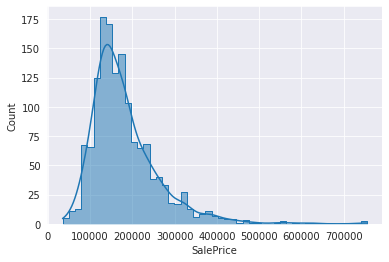

In [8]:
sns.histplot(train_data['SalePrice'],kde=True,element='step')

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Show insights using correlation Heatmap

### Correlation matrix (heatmap style)

<AxesSubplot:>

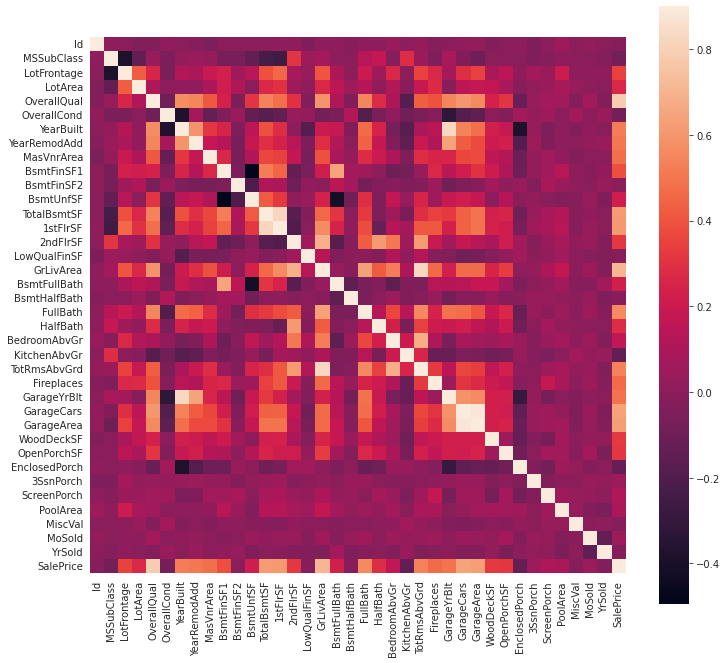

In [10]:
corrmat = train_data.corr()
corrmat
f, ax = plt.subplots(figsize=(12,11))
sns.heatmap(corrmat,square=True,vmax=0.9)

#### 'SalePrice' correlation matrix (zoomed heatmap style)

In [11]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_data[cols].values.T)
#train_data[cols].corr() == np.corrcoef(train_data[cols].values.T)

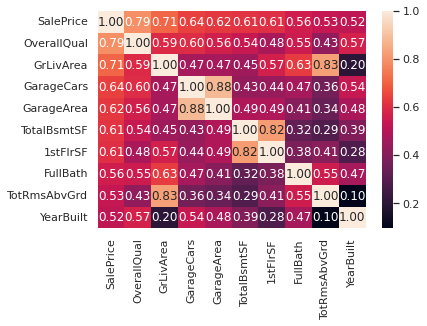

In [12]:
sns.set(font_scale=1)
hm = sns.heatmap(cm,xticklabels=cols.values,yticklabels=cols.values, annot=True, fmt='.2f')
plt.show()

### Scatter plots between 'SalePrice' and correlated variables

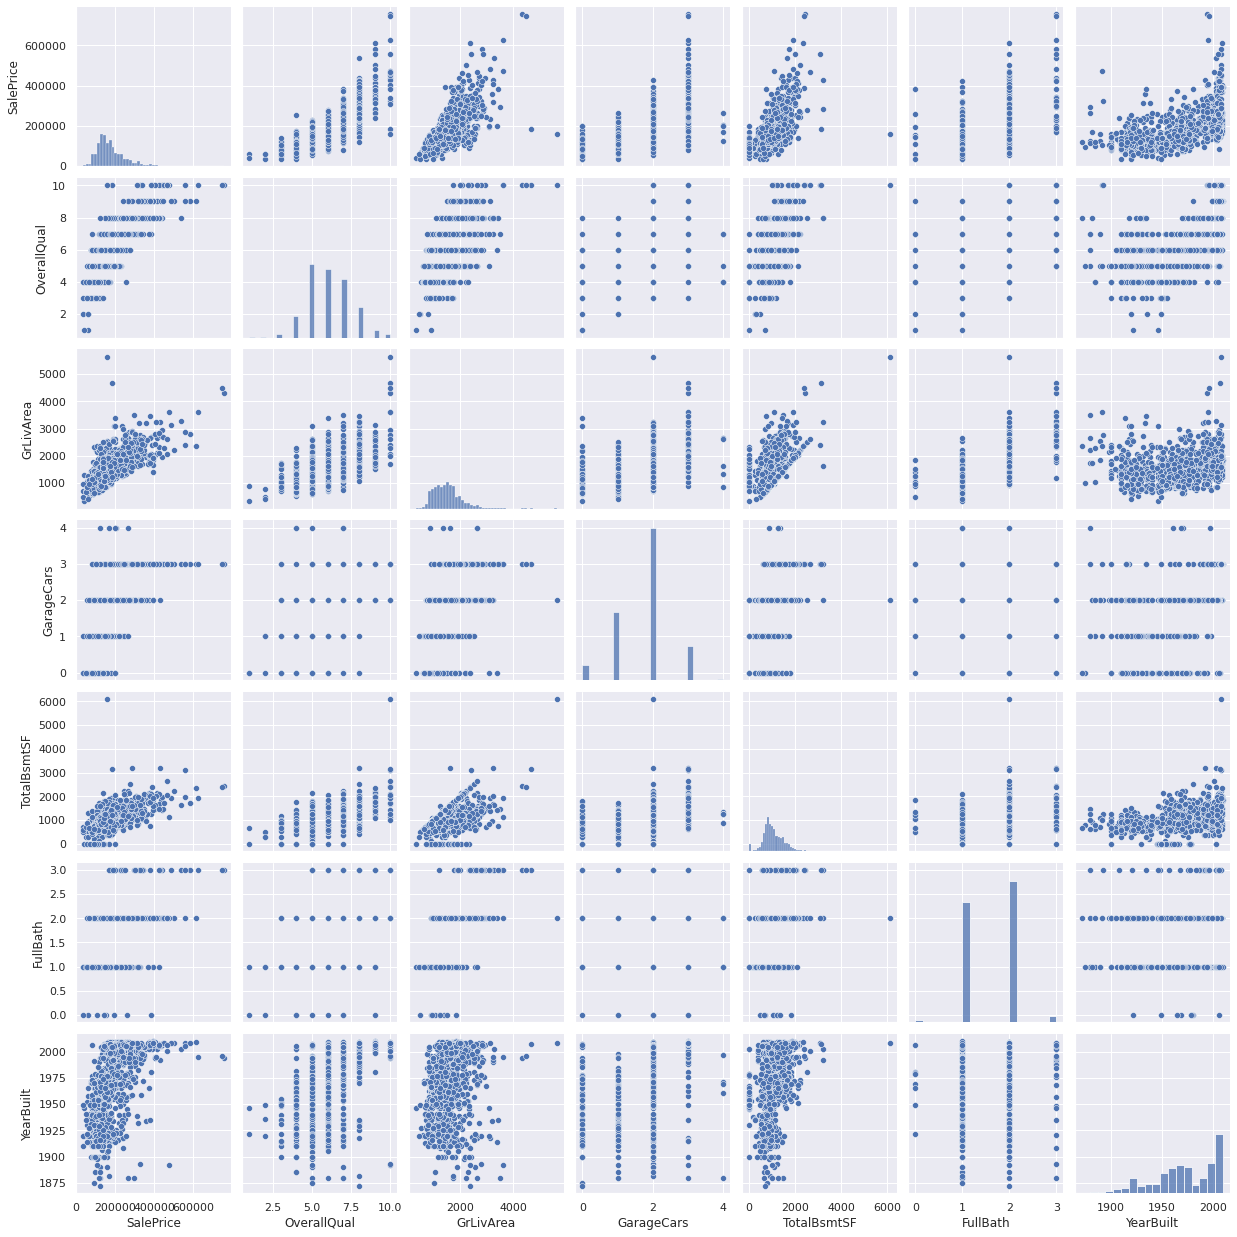

In [13]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_data[cols], height =2.5)
plt.show()

### Since there are positive correlations between SalePrice and the following features columns:
* GrLivArea
* TotalBsmtSF
* GarageArea
* OveralQual


### Relationship between numarical features

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

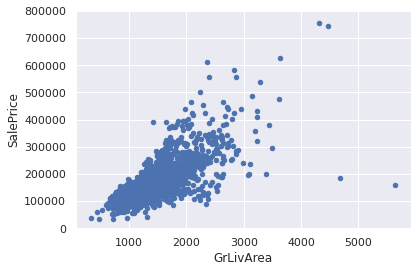

In [14]:
var="GrLivArea"
data= pd.concat([train_data["SalePrice"],train_data[var]], axis=1)
data.plot.scatter(x=var, y="SalePrice",ylim=(0,800000))

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

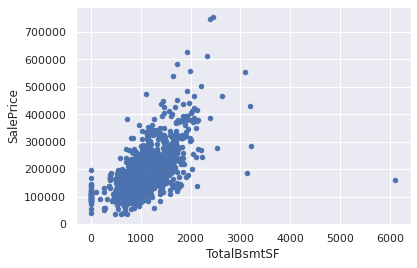

In [15]:
var="TotalBsmtSF"
data= pd.concat([train_data["SalePrice"],train_data[var]], axis=1)
data.plot.scatter(x=var, y="SalePrice")

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

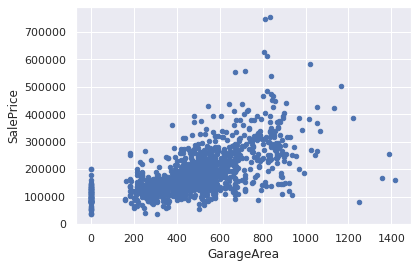

In [16]:
var="GarageArea"
data= pd.concat([train_data["SalePrice"],train_data[var]], axis=1)
data.plot.scatter(x=var, y="SalePrice")

### Relationship between Categorical features

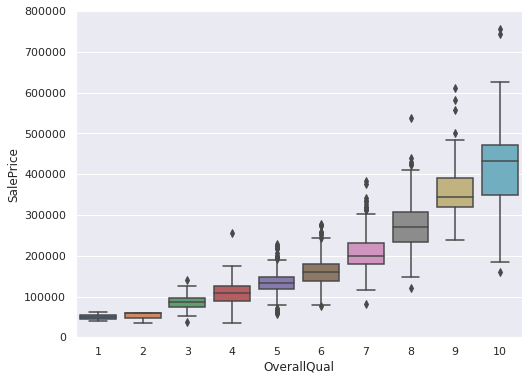

In [17]:
var = 'OverallQual'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

# 3- Missing Data

In [18]:
#missing data
total = train_data.isnull().sum().sort_values(ascending=False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


#### we'll delete all the variables with missing data, except the variable 'Electrical'. In 'Electrical' we'll just impute the observation with the most frequent category value.

delete all the variables with missing data


In [19]:
train_data = train_data.drop((missing_data[missing_data['Total'] > 1]).index,axis=1)
# if we'll just delete the observation with missing data.
#df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)


 In 'Electrical' we'll just impute the observation with the most frequent category value.

In [20]:
train_data['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [21]:
train_data['Electrical'].value_counts().index[0]

'SBrkr'

In [22]:
train_data[train_data['Electrical'].isnull()]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,9735,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2008,WD,Normal,167500


In [23]:
train_data.loc[train_data['Electrical'].isnull(),'Electrical']=train_data['Electrical'].value_counts().index[0]

In [24]:
train_data.iloc[1379]['Electrical']

'SBrkr'

In [25]:
train_data['Electrical'].isnull().sum()

0

#### Check The All Data for Missing values

In [26]:
train_data.isnull().sum().max()

0

In [27]:
not_null_columns = train_data.columns

In [28]:
not_null_columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

# 4- Outliers

#### Univariate analysis (SalePrice)

I reshape the column because: 
train_data["SalePrice"].shape is (1460,) this 1D but  StandardScaler().fit_transform accept only 2D

In [29]:
std = StandardScaler()
scaled_SalePrice = std.fit_transform(train_data["SalePrice"].to_numpy()[:,np.newaxis])
low_range = scaled_SalePrice[scaled_SalePrice[:,0].argsort()][:10]
high_range = scaled_SalePrice[scaled_SalePrice[:,0].argsort()][-10:]

In [30]:
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]

outer range (high) of the distribution:
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


* Low range values are similar and not too far from 0.
* High range values are far from 0 and the 7.something values are really out of range.
>  we'll not consider any of these values as an outlier but we should be careful with those two 7.

#### Bivariate analysis

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

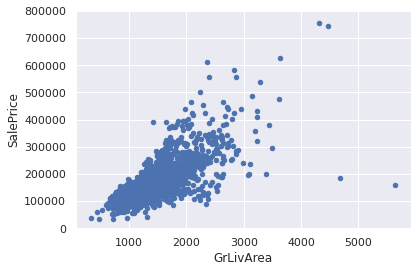

In [31]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

In [32]:
#deleting points
train_data.sort_values(by = 'GrLivArea', ascending = False)[:2]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750


In [33]:
train_data = train_data.drop(train_data[train_data['Id'] == 1299].index)
train_data = train_data.drop(train_data[train_data['Id'] == 524].index)

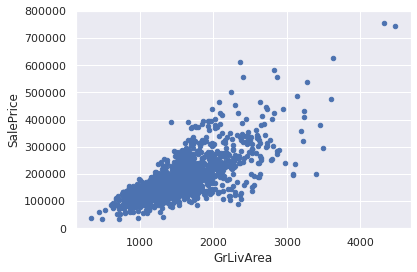

In [34]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

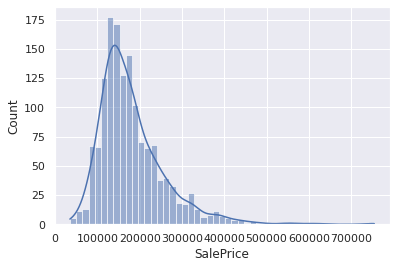

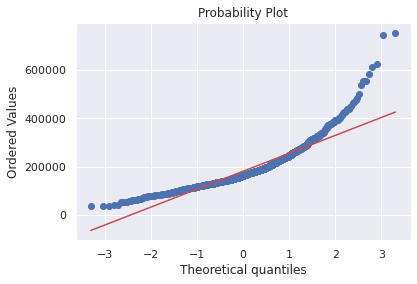

In [35]:
#histogram and normal probability plot
sns.histplot(train_data['SalePrice'],kde=True)
fig = plt.figure()
res = stats.probplot(train_data['SalePrice'], plot=plt)

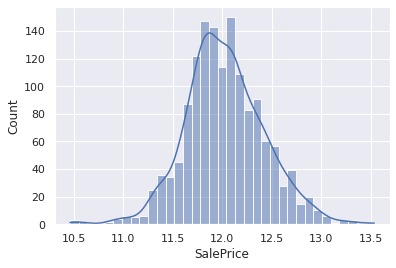

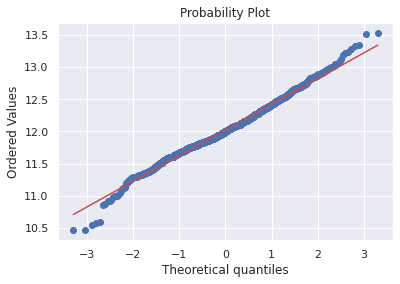

In [36]:
#applying log transformation
train_data['SalePrice'] = np.log(train_data['SalePrice'])
#transformed histogram and normal probability plot
sns.histplot(train_data['SalePrice'],kde=True)
fig = plt.figure()
res = stats.probplot(train_data['SalePrice'], plot=plt)

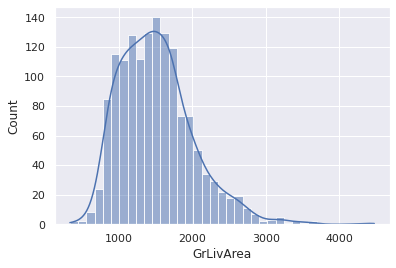

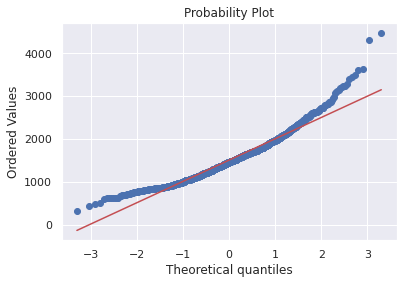

In [37]:
#histogram and normal probability plot
sns.histplot(train_data['GrLivArea'],kde=True)
fig = plt.figure()
res = stats.probplot(train_data['GrLivArea'], plot=plt)

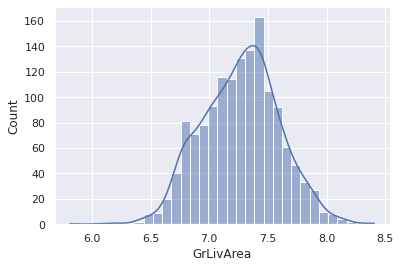

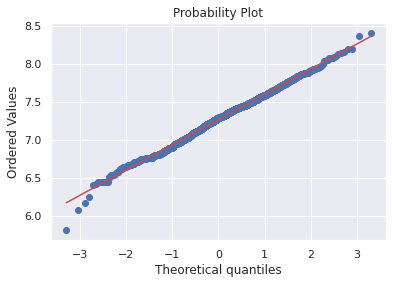

In [38]:
#applying log transformation
train_data['GrLivArea'] = np.log(train_data['GrLivArea'])
#transformed histogram and normal probability plot
sns.histplot(train_data['GrLivArea'],kde=True)
fig = plt.figure()
res = stats.probplot(train_data['GrLivArea'], plot=plt)

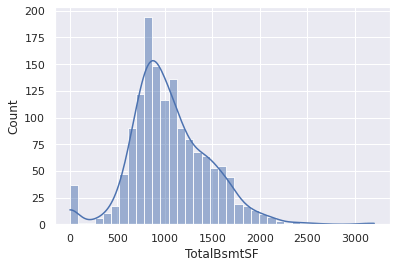

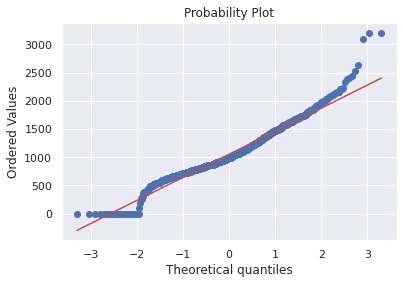

In [39]:
#histogram and normal probability plot
sns.histplot(train_data['TotalBsmtSF'],kde=True)
fig = plt.figure()
res = stats.probplot(train_data['TotalBsmtSF'], plot=plt)

* A significant number of observations with value zero (houses without basement).
* A big problem because the value zero doesn't allow us to do log transformations.

In [40]:
#create column for new variable (one is enough because it's a binary categorical feature)
train_data["HasBasmt"]=pd.Series(data=0,index=train_data.index)
train_data.loc[train_data["TotalBsmtSF"]>0,"HasBasmt"] =1
train_data["HasBasmt"]

0       1
1       1
2       1
3       1
4       1
       ..
1455    1
1456    1
1457    1
1458    1
1459    1
Name: HasBasmt, Length: 1458, dtype: int64

In [41]:
#transform data
TotalBSm_has_bsm = train_data.loc[train_data['HasBasmt']==1,'TotalBsmtSF']
TotalBSm_has_bsm
train_data.loc[train_data['HasBasmt']==1,'TotalBsmtSF'] = np.log(TotalBSm_has_bsm)

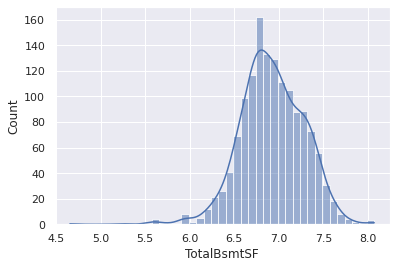

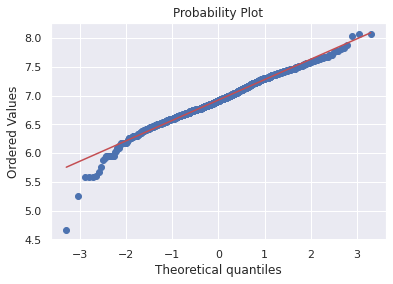

In [42]:
#histogram and normal probability plot
sns.histplot(train_data[train_data['TotalBsmtSF']>0]['TotalBsmtSF'], kde=True);
fig = plt.figure()
res = stats.probplot(train_data[train_data['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

### In the search for writing 'homoscedasticity' right at the first attempt
The best approach to test homoscedasticity for two metric variables is graphically. Departures from an equal dispersion are shown by such shapes as cones (small dispersion at one side of the graph, large dispersion at the opposite side) or diamonds (a large number of points at the center of the distribution).

Starting by 'SalePrice' and 'GrLivArea'.

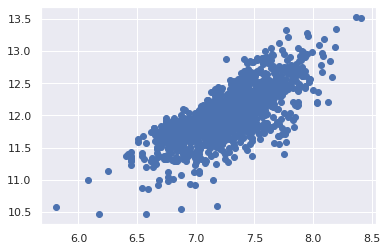

In [43]:
#scatter plot
plt.scatter(train_data['GrLivArea'], train_data['SalePrice']);

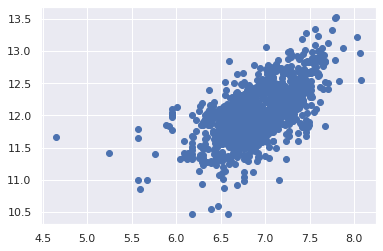

In [44]:
#scatter plot
plt.scatter(train_data[train_data['TotalBsmtSF']>0]['TotalBsmtSF'], train_data[train_data['TotalBsmtSF']>0]['SalePrice']);

- Older versions of this scatter plot (previous to log transformations), had a conic shape (go back and check 'Scatter plots between 'SalePrice' and correlated variables (move like Jagger style)'). As you can see, the current scatter plot doesn't have a conic shape anymore. That's the power of normality! Just by ensuring normality in some variables, we solved the homoscedasticity problem.
- We can say that, in general, 'SalePrice' exhibit equal levels of variance across the range of 'TotalBsmtSF'. Cool!

# 5- Categorical Data (One hot encoding)

### convert categorical variable into dummy

In [45]:
#convert categorical variable into dummy
train_data = pd.get_dummies(train_data)

In [46]:
train_data.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0


# 4- Modeling

In [47]:
X= train_data.drop(columns=["SalePrice"],axis=1)
y=train_data["SalePrice"]

In [48]:
X.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0


In [49]:
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [50]:
train_X,test_X, train_y,test_y = train_test_split(X.values,y.values,test_size=0.25)

In [51]:
XGReg_model = XGBRegressor(random_state=44)
XGReg_model.fit(train_X, train_y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=44,
             reg_alpha=0, reg_lambda=1, ...)

# 5- Evaluation

In [52]:
y_pred = XGReg_model.predict(test_X)
from sklearn.metrics import mean_absolute_error
print(f"Mean Absolute Error: {mean_absolute_error(y_true=test_y,y_pred= y_pred)}")

Mean Absolute Error: 0.09443141361572861


### Model Tuning

In [53]:
XGReg_model = XGBRegressor(n_estimators=1000, learning_rate=0.05,random_state=44)
XGReg_model.fit(train_X, train_y, early_stopping_rounds=5, 
             eval_set=[(test_X, test_y)],verbose=False)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=44,
             reg_alpha=0, reg_lambda=1, ...)

In [54]:
y_pred_2 = XGReg_model.predict(test_X)
print(f"Mean Absolute Error: {mean_absolute_error(y_true=test_y,y_pred= y_pred_2)}")

Mean Absolute Error: 0.08772206555816121


# 6- Prepare Test Data for Submission

In [55]:
test_data = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [56]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [57]:
test_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [58]:
not_null_columns = not_null_columns.drop("SalePrice")

In [59]:
test_data = test_data[not_null_columns]

In [60]:
test_data.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [61]:
test_data.loc[:,'GrLivArea'] = np.log(test_data['GrLivArea'])

In [62]:
#create column for new variable (one is enough because it's a binary categorical feature)
test_data.loc[:,"HasBasmt"]=pd.Series(data=0,index=test_data.index)
test_data.loc[test_data["TotalBsmtSF"]>0,"HasBasmt"] =1
test_data["HasBasmt"]

0       1
1       1
2       1
3       1
4       1
       ..
1454    1
1455    1
1456    1
1457    1
1458    1
Name: HasBasmt, Length: 1459, dtype: int64

In [63]:
#transform data
TotalBSm_has_bsm = test_data.loc[test_data['HasBasmt']==1,'TotalBsmtSF']
TotalBSm_has_bsm
test_data.loc[test_data['HasBasmt']==1,'TotalBsmtSF'] = np.log(TotalBSm_has_bsm)

In [64]:
test_data = pd.get_dummies(test_data)

In [65]:
test_data.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,11622,5,6,1961,1961,468.0,144.0,270.0,...,0,0,0,1,0,0,0,0,1,0
1,1462,20,14267,6,6,1958,1958,923.0,0.0,406.0,...,0,0,0,1,0,0,0,0,1,0
2,1463,60,13830,5,5,1997,1998,791.0,0.0,137.0,...,0,0,0,1,0,0,0,0,1,0
3,1464,60,9978,6,6,1998,1998,602.0,0.0,324.0,...,0,0,0,1,0,0,0,0,1,0
4,1465,120,5005,8,5,1992,1992,263.0,0.0,1017.0,...,0,0,0,1,0,0,0,0,1,0


# 7- submission

In [66]:
train_data= train_data.drop(columns=["SalePrice"],axis=1)

In [67]:
test_data

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,11622,5,6,1961,1961,468.0,144.0,270.0,...,0,0,0,1,0,0,0,0,1,0
1,1462,20,14267,6,6,1958,1958,923.0,0.0,406.0,...,0,0,0,1,0,0,0,0,1,0
2,1463,60,13830,5,5,1997,1998,791.0,0.0,137.0,...,0,0,0,1,0,0,0,0,1,0
3,1464,60,9978,6,6,1998,1998,602.0,0.0,324.0,...,0,0,0,1,0,0,0,0,1,0
4,1465,120,5005,8,5,1992,1992,263.0,0.0,1017.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,1936,4,7,1970,1970,0.0,0.0,546.0,...,0,0,0,1,0,0,0,0,1,0
1455,2916,160,1894,4,5,1970,1970,252.0,0.0,294.0,...,0,0,0,1,1,0,0,0,0,0
1456,2917,20,20000,5,7,1960,1996,1224.0,0.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1457,2918,85,10441,5,5,1992,1992,337.0,0.0,575.0,...,0,0,0,1,0,0,0,0,1,0


In [68]:
final_train, final_test = train_data.align(test_data, join='left', axis=1, fill_value=0)  # inner join

In [69]:
final_train.shape

(1458, 221)

In [70]:
final_test.shape

(1459, 221)

In [71]:
final_prediction = XGReg_model.predict(final_test)

#### we have apply np.log to the SalePrice column so "final_prediction" is log value of the price not the actual value of price 
#### - to have a normal SalePrice values :
- perform inverse of np.log() function --> that is th np.exp() function

In [72]:
final_prediction

array([11.696588 , 12.0094795, 12.117301 , ..., 11.995885 , 11.629779 ,
       12.242161 ], dtype=float32)

In [73]:
predicted_price = np.exp(final_prediction)
predicted_price

array([120160.97, 164304.97, 183010.9 , ..., 162086.42, 112395.47,
       207349.44], dtype=float32)

In [74]:
import pandas as pd
output = pd.DataFrame({"ID":final_test.Id,"SalePrice":predicted_price})

In [75]:
output.head(10)

,ID,SalePrice
0,1461,120160.968750
1,1462,164304.968750
2,1463,183010.906250
3,1464,189567.265625
4,1465,193964.093750
5,1466,172574.640625
6,1467,164264.687500
7,1468,166391.000000
8,1469,179998.234375
9,1470,113632.539062


In [76]:
output.to_csv("submission.csv",index=False)

# ------Thanks-----------